<a href="https://colab.research.google.com/github/vsolodkyi/NeuralNetworks_SkillBox/blob/main/module_3/3_7_%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_%D0%B2_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Обучение модели в Tensorflow

На прошлом уроке мы узнали, как описывать модель. Теперь мы должны понять как определять две другие важные составляющие пайплайна -- лосс функцию и оптимизатор. И наконец, понять как это все соединить вместе.

##Определение лосс функции

На протяжении курса вы познакомились как минимум с тремя типами функций потерь 


*   MSE (mean squared error) -- для задачи регрессии
*   BCE (binary cross entropy) -- для задачи бинарной классификации
*   Categorical cross entropy -- для задачи многоклассовой классификации

Все они реализованы в Keras и находятся в tf.keras.losses:
*   tf.keras.losses.MSE()
*   tf.keras.losses.binary_crossentropy()
*   tf.keras.losses.sparse_categorical_crossentropy()


In [ ]:
import tensorflow as tf
#tf.enable_eager_execution()

In [ ]:
import numpy as np

y_true = np.random.rand(10)
y_pred = np.random.rand(10)

# MSE
# лосс функция принимает предсказанные значение и реальные, и возвращает значение, которое в идеале должно быть близко к 0 -- все просто
print(tf.keras.losses.MSE(y_true=y_true, y_pred=y_pred))

tf.Tensor(0.1334008721101027, shape=(), dtype=float64)


In [ ]:
# Можно проверить, правильно ли MSE реализована в Keras :)
print(np.mean((y_true - y_pred)**2))

0.1334008721101027


In [ ]:
# BCE

print(tf.keras.losses.binary_crossentropy(np.ones(10), np.ones(10)))

loss = tf.keras.losses.BinaryCrossentropy()
print(loss(np.ones(10), np.ones(10)))

tf.Tensor(0.0, shape=(), dtype=float64)
tf.Tensor(0.0, shape=(), dtype=float64)


Но у некоторых функций есть особенности -- например у sparse_categorical_crossentropy. Взгляните на ее сигнатуру ниже:

*Если в Colab написать знак вопроса после функции, можно получить ее сигнатуру и описание входных переменных*

In [ ]:
tf.keras.losses.SparseCategoricalCrossentropy?

# обратите внимание на from_logits=False, аналогично в tf.keras.losses.BinaryCrossentropy

Обратите внимание, что она принимает дополнительный параметр -- from_logits. Здесь стоит напомнить, что данную лосс функцию можно считать двумя способами -- из предсказанных вероятностей и из предсказанных логитов. *Мы использовали этот трюк в последнем домашнем задании*. 

Напомню, что сеть изначально предсказывает логиты, и затем мы превращаем их в вероятности --  с помощью функции активации. Но т.к. мы знаем, что нам предстоит считать лосс, то мы можем не тратить "силы" на вычисление вероятностей и посчитать лосс основываясь на логитах (логарифм + экспонента сильно упрощают запись). Мы как бы перебросили активацию из слоя в лосс и оставили “голый” слой без активации. Такая запись проще и вычислительно более стабильная.


**Важно помнить, что в случае использования логитов (from_logits=True), последний слой должен быть без активации. Это очень распространенная ошибка. Всегда помните об этом.**

Ниже приведем небольшую шпаргалку о том, как комбинировать активацию последнего слоя с лосс функцией:

*Для задачи классификации*
![alt text](https://drive.google.com/uc?export=view&id=1meej-OaIyY4ix00j1zHtBQbkRpwwlA2f)
![alt text](https://drive.google.com/uc?export=view&id=15XvkHAUN6z23RI1UgtBJe94sQ1KNlqiq)
*Для задачи регрессии*
![alt text](https://drive.google.com/uc?export=view&id=1gGkI7RO_tdyaMr8I77ia5BTkJ1kqzo7F)

## Определение оптимизатора

С оптимизатором -- все аналогично. Они живут в tf.keras.optimizers. Например:
*  tf.keras.optimizers.Adam
*  tf.keras.optimizers.SGD и многие другие.

Каждый из оптимизаторов имеет свои параметры, но все разделяют общий -- learning rate.

In [ ]:
tf.keras.optimizers.Adam, tf.keras.optimizers.SGD()

(keras.optimizer_v2.adam.Adam,
 <keras.optimizer_v2.gradient_descent.SGD at 0x7ff2295912d0>)

# Собираем все вместе

##Задача регрессии

Рассмотрим простую задачу определения коэффициентов зависимости шкалы фаренгейта от цельсия. Это классическая формулировка задачи линейной регрессии. Известно, что эта зависимость линейная -- давайте посчитаем ее параметры, исходя из данных:

In [ ]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

# определим наш скромный датасет
celsius = np.array([-10, -40, 10, 20, 36, 5, -12, 14, 36]).astype(np.float32)
fahrenheit = np.array([14., -40., 50., 68., 96.8, 41., 10.4, 57.2, 96.8])

2.7.0


In [ ]:
model = tf.keras.Sequential() # модель состоит из одного слоя с одним выходом и входом.
model.add(tf.keras.layers.Dense(1, input_shape=(1,)))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.5) 
loss = tf.keras.losses.MSE

In [ ]:
# cледующий шаг -- компиляция модели: "связываем" модель, оптимайзер и лосс
model.compile(optimizer=optimizer, loss=loss) 

In [ ]:
# и наконец, обучение модели с помощью метода model.fit.

model.fit?

 Сигнатура выглядит следующим образом (часть параметров, которые мы не будем использовать в ближайшее время скрыта).

```
model.fit(x=None, y=None, batch_size=None, epochs=1, validation_data=None, shuffle=True, ...)
```

*   x, y -- обучающая выборка, входные признаки и ответы
*   batch_size -- размер батча при обучении
*   epochs -- количество эпох
*   validation_data -- данные для валидации, например, (x_val, y_val)
*   shuffle -- перемешивать данные при обучении или нет




In [ ]:
history = model.fit(celsius, fahrenheit, epochs=200, verbose=2)

Epoch 1/200
1/1 - 0s - loss: 7640.4473 - 437ms/epoch - 437ms/step
Epoch 2/200
1/1 - 0s - loss: 5776.8447 - 3ms/epoch - 3ms/step
Epoch 3/200
1/1 - 0s - loss: 4217.0347 - 5ms/epoch - 5ms/step
Epoch 4/200
1/1 - 0s - loss: 2962.4771 - 5ms/epoch - 5ms/step
Epoch 5/200
1/1 - 0s - loss: 2008.5415 - 3ms/epoch - 3ms/step
Epoch 6/200
1/1 - 0s - loss: 1342.1241 - 3ms/epoch - 3ms/step
Epoch 7/200
1/1 - 0s - loss: 939.2366 - 4ms/epoch - 4ms/step
Epoch 8/200
1/1 - 0s - loss: 763.1962 - 2ms/epoch - 2ms/step
Epoch 9/200
1/1 - 0s - loss: 764.6826 - 5ms/epoch - 5ms/step
Epoch 10/200
1/1 - 0s - loss: 884.9651 - 3ms/epoch - 3ms/step
Epoch 11/200
1/1 - 0s - loss: 1062.5999 - 4ms/epoch - 4ms/step
Epoch 12/200
1/1 - 0s - loss: 1242.0554 - 3ms/epoch - 3ms/step
Epoch 13/200
1/1 - 0s - loss: 1381.2677 - 4ms/epoch - 4ms/step
Epoch 14/200
1/1 - 0s - loss: 1455.5226 - 10ms/epoch - 10ms/step
Epoch 15/200
1/1 - 0s - loss: 1457.0801 - 7ms/epoch - 7ms/step
Epoch 16/200
1/1 - 0s - loss: 1391.7859 - 5ms/epoch - 5ms/step

Модель обучена. Для того, чтобы узнать итоговые коэффициенты, воcпользуемся model.get_weights()

In [ ]:
model.get_weights()

[array([[-1.2516521]], dtype=float32), array([0.], dtype=float32)]

В реальности эти две шкалы связаны формулой:
$$
F = 1.8C + 32
$$

Неудивительно, что мы получили правильные коэффициенты ;)


**История обучения**

Помимо обучения модели и прогресс бара, model.fit(...), возвращает полезный объект -- историю. Давайте взглянем на нее ближе.

In [ ]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.head()

,loss
0,7640.447266
1,5776.844727
2,4217.034668
3,2962.477051
4,2008.541504


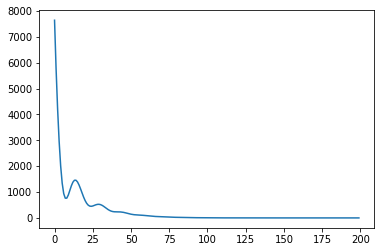

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_df.loss)

На графике можно увидеть как менялся лосс на протяжении 200 эпох. Можно заметить, что обучение можно было остановить после 100 эпохи.


##Задача классификации

In [ ]:
#@title
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, Normalize
from sklearn.metrics import accuracy_score


%matplotlib inline
np.random.seed(10)

colors = ['red', "blue"]
labels_cmap = ListedColormap(colors, 2)
colors = [(1, 0, 0), (1, 1, 1), (0, 0, 1)]  # R -> W -> B
main_cmap = LinearSegmentedColormap.from_list("main_scheme", colors, N=300)

def show_data(X, y):
    plt.figure(figsize=(5, 5))
    plt.scatter(X[:, 0], X[:, 1], s=120, color=labels_cmap(y))
    

def show_descision_boundary(clf, limits, binary=False, X=None, y=None, n_lines=10, show_lines=False,
                           figsize=(5, 5), ax=None):
    xs, ys = limits
    x_min, x_max = xs
    y_min, y_max = ys
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    if ax is None:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(1, 1, 1)
    
    if binary:
        Z = clf.predict_class(np.c_[xx.ravel(), xx.ravel()])
        Z = clf.predict_class(np.c_[xx.ravel(), yy.ravel()])
        norm = Normalize(vmin=0.,vmax=1.)
    else:
        Z = clf(np.c_[xx.ravel(), xx.ravel()])
        Z = clf(np.c_[xx.ravel(), yy.ravel()])
        #if clf.prob_output:
        #    norm = Normalize(vmin=0.,vmax=1.)
        #else:
        norm = Normalize(vmin=-10.,vmax=10., clip=True)
    Z = Z.numpy() 
    Z = Z.reshape(xx.shape)
    Z = Z.astype(np.float32)
    
    ax.contourf(xx, yy, Z, n_lines, alpha=0.4, cmap=main_cmap, norm=norm)
    if show_lines:
        cp = ax.contour(xx, yy, Z, n_lines)
        ax.clabel(cp, inline=True, 
              fontsize=10, colors="green")
    
    if y is not None:
        X = np.array(X)
        y = np.array(y)
        ax.scatter(X[:, 0], X[:, 1], s=120, color=labels_cmap(y),
                   zorder=4)
        


Аналогично можно решить задачу классификации. Помните эту выборку? Мы пытались ее разделить тремя нейронами самостоятельно в самом первом модуле! Давайте теперь сделаем это с помощью Tensorflow.

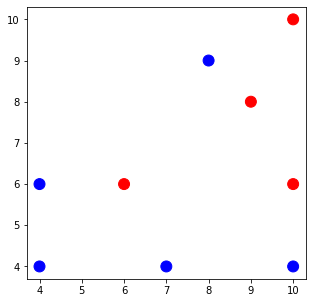

In [ ]:
X = np.array([[10, 6], [7, 4], [6, 6], [9, 8], [10, 10],
              [10, 4], [4, 4], [4, 6], [8, 9]])
y = np.array([0, 1, 0, 0, 0, 1, 1, 1, 1])
show_data(X, y)

Без каких-либо сложностей, мы преобразуем модель в модель для классификации. Для этого нужно изменить лосс функцию и функцию активации последнего слоя.

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, input_shape=(2,), activation="sigmoid"))
model.add(tf.keras.layers.Dense(1)) # мы хотим визуализировать логиты, поэтому без активации

optimizer = tf.keras.optimizers.Adam(learning_rate=0.05) 
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True) # лосс -- с логитами

При компиляции модели добавим еще одно поле -- **metrics**. Метрики не влияют на обучение, но очень полезны для его контроля. Например, обучая классификатор удобно смотреть не только на лосс, но и на точность.

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"]) # для дополнительного контроля 
                                                                    #-- просим сообщать не только лосс, но и точность.
history = model.fit(X, y, epochs=100, verbose=2)

Epoch 1/100
1/1 - 1s - loss: 0.7151 - accuracy: 0.5556 - 501ms/epoch - 501ms/step
Epoch 2/100
1/1 - 0s - loss: 0.6941 - accuracy: 0.5556 - 7ms/epoch - 7ms/step
Epoch 3/100
1/1 - 0s - loss: 0.6839 - accuracy: 0.4444 - 6ms/epoch - 6ms/step
Epoch 4/100
1/1 - 0s - loss: 0.6812 - accuracy: 0.4444 - 4ms/epoch - 4ms/step
Epoch 5/100
1/1 - 0s - loss: 0.6829 - accuracy: 0.4444 - 4ms/epoch - 4ms/step
Epoch 6/100
1/1 - 0s - loss: 0.6859 - accuracy: 0.4444 - 3ms/epoch - 3ms/step
Epoch 7/100
1/1 - 0s - loss: 0.6876 - accuracy: 0.4444 - 3ms/epoch - 3ms/step
Epoch 8/100
1/1 - 0s - loss: 0.6872 - accuracy: 0.4444 - 6ms/epoch - 6ms/step
Epoch 9/100
1/1 - 0s - loss: 0.6850 - accuracy: 0.4444 - 3ms/epoch - 3ms/step
Epoch 10/100
1/1 - 0s - loss: 0.6818 - accuracy: 0.4444 - 3ms/epoch - 3ms/step
Epoch 11/100
1/1 - 0s - loss: 0.6787 - accuracy: 0.4444 - 3ms/epoch - 3ms/step
Epoch 12/100
1/1 - 0s - loss: 0.6767 - accuracy: 0.4444 - 3ms/epoch - 3ms/step
Epoch 13/100
1/1 - 0s - loss: 0.6762 - accuracy: 0.4444 -

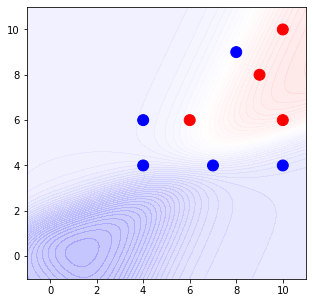

In [ ]:
limits = [[-1, 11], [-1, 11]]

show_descision_boundary(limits=limits, clf=model, binary=False,
                                X=X,
                                y=y, 
                                n_lines=50,
                                show_lines=False)

In [ ]:
pd.DataFrame(history.history).head()

,loss,accuracy
0,0.715133,0.555556
1,0.694092,0.555556
2,0.683867,0.444444
3,0.681213,0.444444
4,0.682928,0.444444


## Рекомендации к практическому заданию
В следующем практическом задании перед вами будет стоять задача обучения сетей для синтетических данных. Для этого вам нужно будет подобрать самим количество слоев, количество нейронов и скорость обучения. **Как это сделать?** К сожалению, однозначного ответа на этот вопрос нет. 

Чем сложнее задача, тем сложнее должна быть архитектура. Сложность архитектуры зависит от количества слоев и нейронов. Задачи, которые вас ждут с ближайшей практике, данные не слишком сложные -- поэтому не переусердствуйте. *Начните с одного слоя, понаблюдайте, как изменяется точность, добавьте еще один, если понадобится. Экспериментируйте!*

Но это не единственный рычаг, который можно двигать. Еще есть скорость обучения. Если вы замечаете при обучении, что ошибка не меняется, но архитектура должна справиться, то возможно скорость обучения слишком маленькая. Обычно она находится в диапазоне 0.0001-0.1.

В реальных задачах глубина сети, количество нейронов, скорость обучения -- это гиперпараметры, которые нужно подбирать наблюдая за качеством на валидационной выборкой.


#Заключение
В этом уроке мы научились:


1.   Определять лосс функцию
2.   Определять оптимизатор
3.   Компилировать и обучать модель для задачи классификации и регрессии.

Теперь вы можете перейти к практике для закрепления материала: [ссылка](https://colab.research.google.com/drive/11pzWQSauLzuoUPyRW10zV1p7o4NKMVB7).

